### Expected - observed 

Figure saved successfully at: C:/Users/maliz/thesa/UKbiobank/plots_for_thesis/expected_minus_observed_differences_olida_all.png


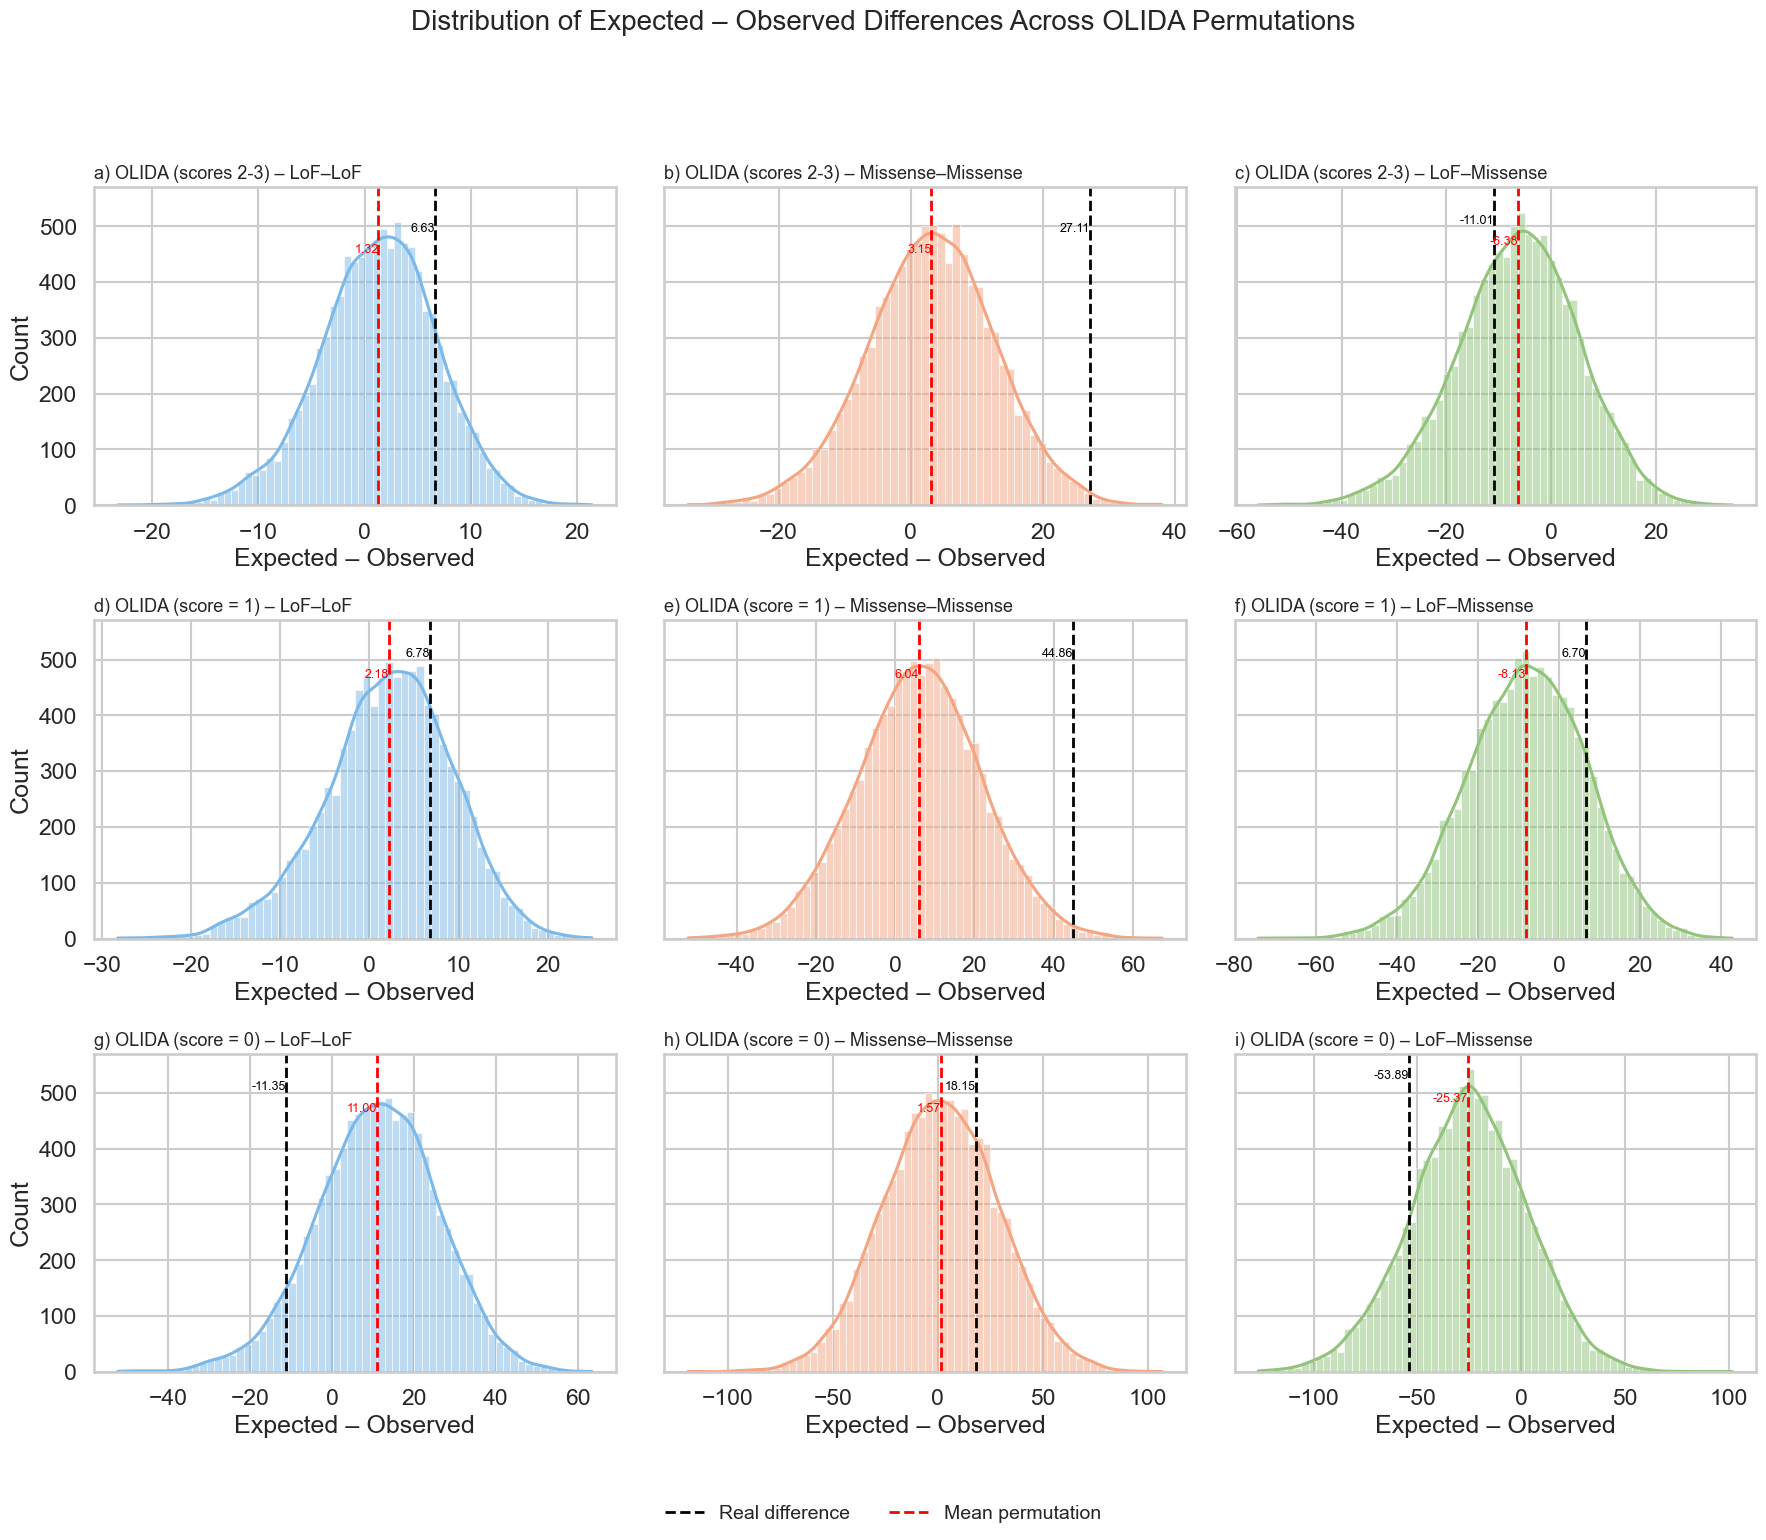

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", context="talk")

# --- Define dataset configurations (order: none → 1 → 0) ---
datasets = [
    {
        "label": "a–c",  # for clarity
        "perm_folder": "C:/Users/maliz/thesa/UKbiobank/data/permutation_olida",
        "paralog_folder": "C:/Users/maliz/thesa/UKbiobank/data/olida_result",
        "missense_file": "olida_missense_results.csv",
        "lof_file": "olida_lof_results.csv",
        "lof_miss_file": "olida_lof_missense_combined_results.csv",
        "title_prefix": "OLIDA (scores 2-3)"
    },
    {
        "label": "d–f",
        "perm_folder": "C:/Users/maliz/thesa/UKbiobank/data/permutation_olida_1_score",
        "paralog_folder": "C:/Users/maliz/thesa/UKbiobank/data/olida_result",
        "missense_file": "olida_missense_full_version_1_results.csv",
        "lof_file": "olida_lof_full_version_1_results.csv",
        "lof_miss_file": "olida_lof_missense_combined_full_version_1_results.csv",
        "title_prefix": "OLIDA (score = 1)"
    },
    {
        "label": "g–i",
        "perm_folder": "C:/Users/maliz/thesa/UKbiobank/data/permutation_olida_0_score",
        "paralog_folder": "C:/Users/maliz/thesa/UKbiobank/data/olida_result",
        "missense_file": "olida_missense_0_results.csv",
        "lof_file": "olida_lof_0_results.csv",
        "lof_miss_file": "olida_lof_missense_combined_0_results.csv",
        "title_prefix": "OLIDA (score = 0)"
    }
]

save_path = "C:/Users/maliz/thesa/UKbiobank/plots_for_thesis/expected_minus_observed_differences_olida_all.png"

# --- Helper function to compute observed and permutation differences ---
def compute_differences(paralog_folder, perm_folder, missense_file, lof_file, lof_miss_file):
    # Observed
    df_lof = pd.read_csv(os.path.join(paralog_folder, lof_file))[['expected_both_lof', 'both_lof']].sum()
    df_missense = pd.read_csv(os.path.join(paralog_folder, missense_file))[['expected_both_missense', 'both_missense']].sum()
    df_lof_miss = pd.read_csv(os.path.join(paralog_folder, lof_miss_file))[['expected_both_lof_missense_combined', 'both_lof_missense_combined']].sum()

    obs = {
        "LoF–LoF": df_lof['expected_both_lof'] - df_lof['both_lof'],
        "Missense–Missense": df_missense['expected_both_missense'] - df_missense['both_missense'],
        "LoF–Missense": df_lof_miss['expected_both_lof_missense_combined'] - df_lof_miss['both_lof_missense_combined']
    }

    # Permutations
    diff_lof, diff_miss, diff_lof_miss = [], [], []
    for filename in os.listdir(perm_folder):
        if filename.endswith(".csv"):
            df = pd.read_csv(os.path.join(perm_folder, filename))
            diff_lof.append((df['expected_both_lof'] - df['both_lof']).sum())
            diff_miss.append((df['expected_both_missense'] - df['both_missense']).sum())
            diff_lof_miss.append((df['expected_both_lof_missense_combined'] - df['both_lof_missense_combined']).sum())
    perm = {
        "LoF–LoF": diff_lof,
        "Missense–Missense": diff_miss,
        "LoF–Missense": diff_lof_miss
    }

    return obs, perm

# --- Helper plotting function ---
def plot_panel(ax, data, obs_value, title, color, letter):
    sns.histplot(data, kde=True, ax=ax, color=color)
    ax.axvline(obs_value, color='black', linestyle='--', linewidth=2, label='Real difference')
    ax.axvline(np.mean(data), color='red', linestyle='--', linewidth=2, label='Mean permutation')
    ax.text(obs_value, ax.get_ylim()[1]*0.92, f"{obs_value:.2f}", color='black', ha='right', fontsize=9)
    ax.text(np.mean(data), ax.get_ylim()[1]*0.85, f"{np.mean(data):.2f}", color='red', ha='right', fontsize=9)
    ax.set_title(f"{letter}) {title}", fontsize=13, loc='left')
    ax.set_xlabel("Expected – Observed")
    ax.set_ylabel("Count")

# --- Create 3x3 figure ---
fig, axs = plt.subplots(3, 3, figsize=(18, 15), sharey=True)
fig.suptitle("Distribution of Expected – Observed Differences Across OLIDA Permutations", fontsize=20, y=1.02)

# --- Define colors per column ---
colors = ["#7CB9E8", "#F4A582", "#92C47C"]
mutation_types = ["LoF–LoF", "Missense–Missense", "LoF–Missense"]

# --- Panel letters ---
letters = [chr(i) for i in range(97, 106)]  # a–i

# --- Loop over rows (datasets) and columns (mutation types) ---
panel_idx = 0
for row, ds in enumerate(datasets):
    obs, perm = compute_differences(ds["paralog_folder"], ds["perm_folder"],
                                   ds["missense_file"], ds["lof_file"], ds["lof_miss_file"])
    for col, mut_type in enumerate(mutation_types):
        plot_panel(axs[row, col], perm[mut_type], obs[mut_type],
                   f"{ds['title_prefix']} – {mut_type}", colors[col], letters[panel_idx])
        panel_idx += 1

# --- Shared legend ---
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=14, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 0.97])
fig.savefig(save_path, dpi=600, bbox_inches="tight")
print(f"Figure saved successfully at: {save_path}")

plt.show()


In [2]:
def empirical_p_value_right(obs, perm_diffs):
    perm_diffs = np.array(perm_diffs)
    extreme = np.sum(perm_diffs >= obs)   # right tail
    print (extreme)
    print  ((extreme + 1) / (len(perm_diffs) + 1))
    return (extreme + 1) / (len(perm_diffs) + 1)

In [3]:
p_lof = empirical_p_value_right(obs_diff_lof, diff_lof)
p_missense = empirical_p_value_right(obs_diff_missense, diff_missense)
p_lof_missense_combined = empirical_p_value_right(obs_diff_lof_missense_combined, diff_lof_missense_combined)

1614
0.16148385161483853
48
0.004899510048995101
6657
0.6657334266573343


In [12]:
df2 = pd.read_csv(os.path.join(paralog_folder, "olida_missense_results.csv"))

In [13]:
df2[df2.expected_both_missense > 5]

,gene_1,gene_2,both_missense,missense_1,missense_2,expected_both_missense,p-value_missense
8,ENSG00000107736,ENSG00000137474,70.0,4606,6984,77.883941,0.202921
11,ENSG00000131183,ENSG00000198569,3.0,1254,1897,5.759498,0.173990
32,ENSG00000091536,ENSG00000075275,10.0,2548,2042,12.597226,0.287866
33,ENSG00000092054,ENSG00000112769,9.0,2688,1627,10.588552,0.386775
42,ENSG00000120008,ENSG00000101292,5.0,1921,1151,5.353311,0.554214
43,ENSG00000137474,ENSG00000164199,55.0,6984,3560,60.196880,0.277028
48,ENSG00000155657,ENSG00000168538,11.0,3144,1846,14.051866,0.255689
57,ENSG00000186862,ENSG00000164199,9.0,800,3560,6.895404,0.840942


In [8]:
df2[df2.index == 8]

,gene_1,gene_2,both_missense,missense_1,missense_2,expected_both_missense,p-value_missense
8,ENSG00000107736,ENSG00000137474,70.0,4606,6984,77.883941,0.202921


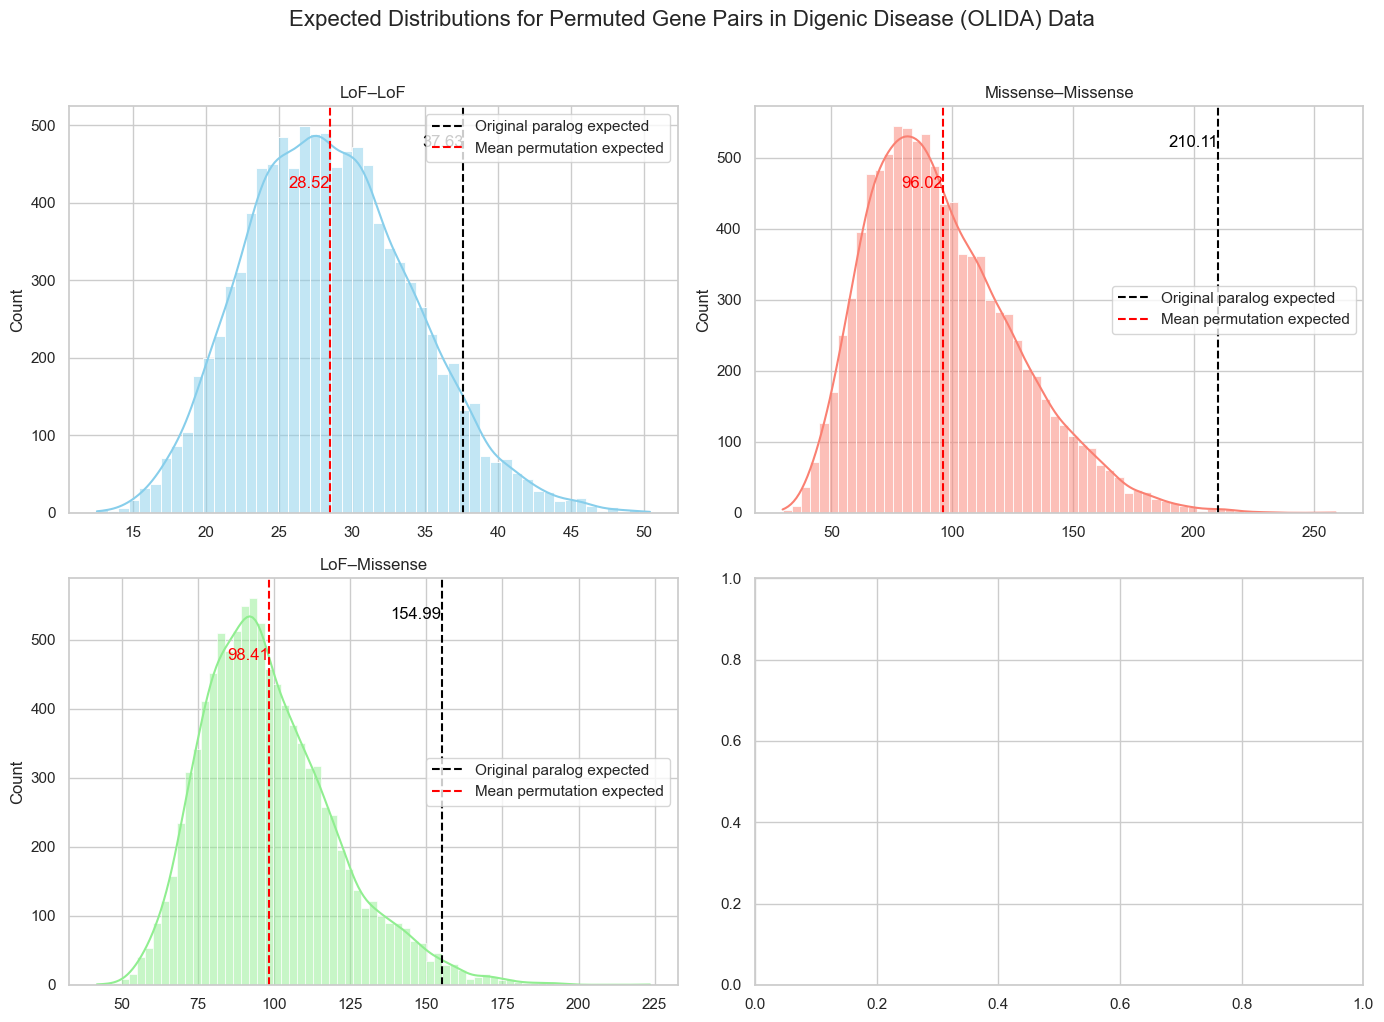

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
perm_folder = "C:/Users/maliz/thesa/UKbiobank/data/permutation_olida"
paralog_folder = "C:/Users/maliz/thesa/UKbiobank/data/olida_result"

# Load observed expected sums from paralog files
real_lof = pd.read_csv(os.path.join(paralog_folder, "olida_lof_results.csv"))[['expected_both_lof']].sum()
real_missense = pd.read_csv(os.path.join(paralog_folder, "olida_missense_results.csv"))[['expected_both_missense']].sum()
real_lof_missense_combined = pd.read_csv(os.path.join(paralog_folder, "olida_lof_missense_combined_results.csv"))[['expected_both_lof_missense_combined']].sum()

# Initialize permutation expected values
exp_lof = []
exp_missense = []
exp_lof_missense_combined = []

# Read permutations
for filename in os.listdir(perm_folder):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(perm_folder, filename))
        exp_lof.append(df['expected_both_lof'].sum())
        exp_missense.append(df['expected_both_missense'].sum())
        exp_lof_missense_combined.append(df['expected_both_lof_missense_combined'].sum())

# Plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Shared big title
fig.suptitle("Expected Distributions for Permuted Gene Pairs in Digenic Disease (OLIDA) Data", 
             fontsize=16, y=1.02)

# ---- LoF–LoF ----
sns.histplot(exp_lof, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].axvline(real_lof['expected_both_lof'], color='black', linestyle='--', 
                  label='Original paralog expected')
axs[0, 0].axvline(np.mean(exp_lof), color='red', linestyle='--', 
                  label='Mean permutation expected')
axs[0, 0].text(real_lof['expected_both_lof'], axs[0, 0].get_ylim()[1]*0.9, 
               f"{real_lof['expected_both_lof']:.2f}", color='black', ha='right')
axs[0, 0].text(np.mean(exp_lof), axs[0, 0].get_ylim()[1]*0.8, 
               f"{np.mean(exp_lof):.2f}", color='red', ha='right')
axs[0, 0].set_title("LoF–LoF")
axs[0, 0].legend()

# ---- Missense–Missense ----
sns.histplot(exp_missense, kde=True, ax=axs[0, 1], color='salmon')
axs[0, 1].axvline(real_missense['expected_both_missense'], color='black', linestyle='--', 
                  label='Original paralog expected')
axs[0, 1].axvline(np.mean(exp_missense), color='red', linestyle='--', 
                  label='Mean permutation expected')
axs[0, 1].text(real_missense['expected_both_missense'], axs[0, 1].get_ylim()[1]*0.9, 
               f"{real_missense['expected_both_missense']:.2f}", color='black', ha='right')
axs[0, 1].text(np.mean(exp_missense), axs[0, 1].get_ylim()[1]*0.8, 
               f"{np.mean(exp_missense):.2f}", color='red', ha='right')
axs[0, 1].set_title("Missense–Missense")
axs[0, 1].legend()

# ---- LoF–Missense ----
sns.histplot(exp_lof_missense_combined, kde=True, ax=axs[1, 0], color='lightgreen')
axs[1, 0].axvline(real_lof_missense_combined['expected_both_lof_missense_combined'], color='black', linestyle='--', 
                  label='Original paralog expected')
axs[1, 0].axvline(np.mean(exp_lof_missense_combined), color='red', linestyle='--', 
                  label='Mean permutation expected')
axs[1, 0].text(real_lof_missense_combined['expected_both_lof_missense_combined'], axs[1, 0].get_ylim()[1]*0.9, 
               f"{real_lof_missense_combined['expected_both_lof_missense_combined']:.2f}", color='black', ha='right')
axs[1, 0].text(np.mean(exp_lof_missense_combined), axs[1, 0].get_ylim()[1]*0.8, 
               f"{np.mean(exp_lof_missense_combined):.2f}", color='red', ha='right')
axs[1, 0].set_title("LoF–Missense")
axs[1, 0].legend()



plt.tight_layout()
plt.show()

# Save high resolution figure
# fig.savefig(os.path.join("C:/Users/maliz/thesa/UKbiobank/python_and_R/plots_for_thesis", 
#                          "expected_distributions_dida.png"), dpi=600, bbox_inches="tight")


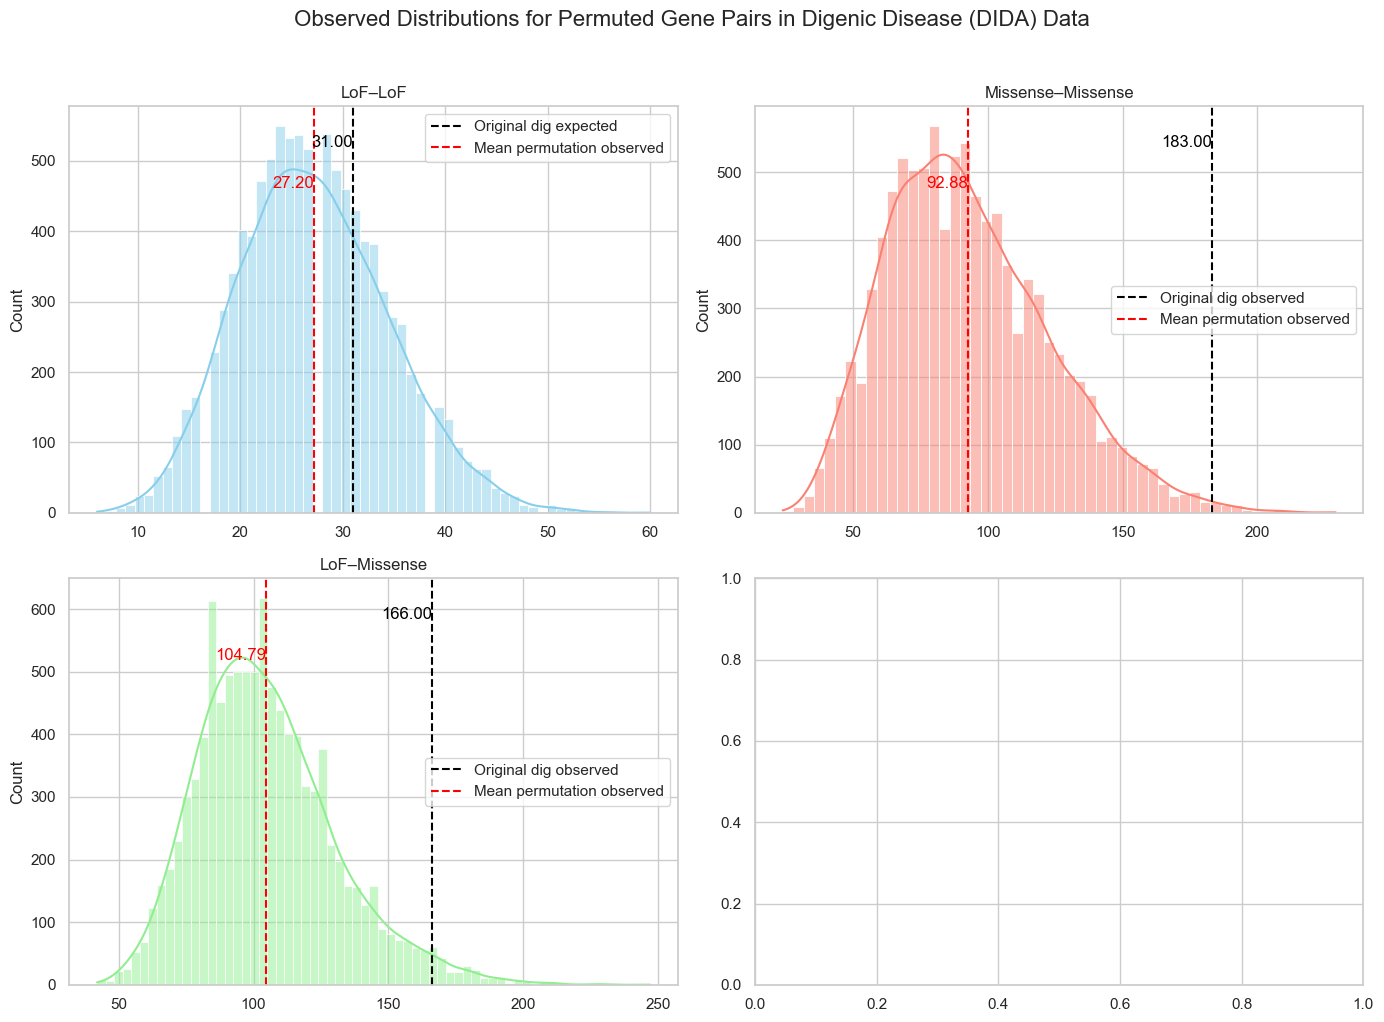

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

perm_folder = "C:/Users/maliz/thesa/UKbiobank/data/permutation_olida"
paralog_folder = "C:/Users/maliz/thesa/UKbiobank/data/olida_result"

# Load observed expected sums from paralog files
real_lof = pd.read_csv(os.path.join(paralog_folder, "olida_lof_results.csv"))[['both_lof']].sum()
real_missense = pd.read_csv(os.path.join(paralog_folder, "olida_missense_results.csv"))[['both_missense']].sum()
real_lof_missense_combined = pd.read_csv(os.path.join(paralog_folder, "olida_lof_missense_combined_results.csv"))[['both_lof_missense_combined']].sum()

# Initialize permutation expected values
exp_lof = []
exp_missense = []
exp_lof_missense = []
exp_missense_lof = []
exp_lof_missense_combined = []

# Read permutations
for filename in os.listdir(perm_folder):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(perm_folder, filename))
        exp_lof.append(df['both_lof'].sum())
        exp_missense.append(df['both_missense'].sum())
        exp_lof_missense_combined.append(df['both_lof_missense_combined'].sum())

# Plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Shared big title
fig.suptitle("Observed Distributions for Permuted Gene Pairs in Digenic Disease (DIDA) Data", 
             fontsize=16, y=1.02)

# ---- LoF–LoF ----
sns.histplot(exp_lof, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].axvline(real_lof['both_lof'], color='black', linestyle='--', 
                  label='Original dig expected')
axs[0, 0].axvline(np.mean(exp_lof), color='red', linestyle='--', 
                  label='Mean permutation observed')
axs[0, 0].text(real_lof['both_lof'], axs[0, 0].get_ylim()[1]*0.9, 
               f"{real_lof['both_lof']:.2f}", color='black', ha='right')
axs[0, 0].text(np.mean(exp_lof), axs[0, 0].get_ylim()[1]*0.8, 
               f"{np.mean(exp_lof):.2f}", color='red', ha='right')
axs[0, 0].set_title("LoF–LoF")
axs[0, 0].legend()

# ---- Missense–Missense ----
sns.histplot(exp_missense, kde=True, ax=axs[0, 1], color='salmon')
axs[0, 1].axvline(real_missense['both_missense'], color='black', linestyle='--', 
                  label='Original dig observed')
axs[0, 1].axvline(np.mean(exp_missense), color='red', linestyle='--', 
                  label='Mean permutation observed')
axs[0, 1].text(real_missense['both_missense'], axs[0, 1].get_ylim()[1]*0.9, 
               f"{real_missense['both_missense']:.2f}", color='black', ha='right')
axs[0, 1].text(np.mean(exp_missense), axs[0, 1].get_ylim()[1]*0.8, 
               f"{np.mean(exp_missense):.2f}", color='red', ha='right')
axs[0, 1].set_title("Missense–Missense")
axs[0, 1].legend()

# ---- LoF–Missense ----
sns.histplot(exp_lof_missense_combined, kde=True, ax=axs[1, 0], color='lightgreen')
axs[1, 0].axvline(real_lof_missense_combined['both_lof_missense_combined'], color='black', linestyle='--', 
                  label='Original dig observed')
axs[1, 0].axvline(np.mean(exp_lof_missense_combined), color='red', linestyle='--', 
                  label='Mean permutation observed')
axs[1, 0].text(real_lof_missense_combined['both_lof_missense_combined'], axs[1, 0].get_ylim()[1]*0.9, 
               f"{real_lof_missense_combined['both_lof_missense_combined']:.2f}", color='black', ha='right')
axs[1, 0].text(np.mean(exp_lof_missense_combined), axs[1, 0].get_ylim()[1]*0.8, 
               f"{np.mean(exp_lof_missense_combined):.2f}", color='red', ha='right')
axs[1, 0].set_title("LoF–Missense")
axs[1, 0].legend()


plt.tight_layout()
plt.show()

# Save high resolution figure
# fig.savefig(os.path.join("C:/Users/maliz/thesa/UKbiobank/python_and_R/plots_for_thesis", 
#                          "expected_distributions_dida.png"), dpi=600, bbox_inches="tight")



In [32]:
import pandas as pd
import glob
import os

# Create set of pairs for fast lookup
pairs_set = set(zip(digenics_pairs_version_2_df["gene_1"], 
                    digenics_pairs_version_2_df["gene_2"]))

# Folder with csv files
folder = "C:/Users/maliz/thesa/UKbiobank/data/dig_result"
csv_files = glob.glob(os.path.join(folder, "*.csv"))

# Process each file
for file in csv_files:
    df = pd.read_csv(file)

    # Filter rows based on pairs
    df_filtered = df[df.apply(lambda row: (row["gene_1"], row["gene_2"]) in pairs_set, axis=1)]

    # Build output file name: version_2_<original_filename>.csv
    base_name = os.path.basename(file)
    out_file = os.path.join(folder, f"version_2_{base_name}")

    df_filtered.to_csv(out_file, index=False)
    print(f"Filtered {file} -> {out_file}, kept {len(df_filtered)} rows")


Filtered C:/Users/maliz/thesa/UKbiobank/data/dig_result\dig_lof_missense_combined_results.csv -> C:/Users/maliz/thesa/UKbiobank/data/dig_result\version_2_dig_lof_missense_combined_results.csv, kept 70 rows
Filtered C:/Users/maliz/thesa/UKbiobank/data/dig_result\dig_lof_missense_results.csv -> C:/Users/maliz/thesa/UKbiobank/data/dig_result\version_2_dig_lof_missense_results.csv, kept 70 rows
Filtered C:/Users/maliz/thesa/UKbiobank/data/dig_result\dig_lof_results.csv -> C:/Users/maliz/thesa/UKbiobank/data/dig_result\version_2_dig_lof_results.csv, kept 70 rows
Filtered C:/Users/maliz/thesa/UKbiobank/data/dig_result\dig_missense_lof_results.csv -> C:/Users/maliz/thesa/UKbiobank/data/dig_result\version_2_dig_missense_lof_results.csv, kept 70 rows
Filtered C:/Users/maliz/thesa/UKbiobank/data/dig_result\dig_missense_results.csv -> C:/Users/maliz/thesa/UKbiobank/data/dig_result\version_2_dig_missense_results.csv, kept 70 rows


In [27]:
digenics_pairs_df = pd.read_csv("C:/Users/maliz/thesa/UKbiobank/data/digenics_pairs.csv")

In [28]:
digenics_pairs_df

,num,gene,symbol_1,symbol_2,gene_1,chr_1,gene_2,chr_2
0,dd001,KCNQ1/KCNH2,KCNQ1,KCNH2,ENSG00000053918,11,ENSG00000055118,7
1,dd002,GJB3/GJB2,GJB3,GJB2,ENSG00000188910,1,ENSG00000165474,13
2,dd005,FOXI1/SLC26A4,FOXI1,SLC26A4,ENSG00000168269,5,ENSG00000091137,7
3,dd006,ATP2B2/CDH23,ATP2B2,CDH23,ENSG00000157087,3,ENSG00000107736,10
4,dd010,NEK1/DYNC2H1,NEK1,DYNC2H1,ENSG00000137601,4,ENSG00000187240,11
...,...,...,...,...,...,...,...,...
163,du61,XPC/RECQL4,XPC,RECQL4,ENSG00000154767,3,ENSG00000160957,8
164,du62,MMP2/TPO,MMP2,TPO,ENSG00000087245,16,ENSG00000115705,2
165,du63,LPAR6/AGL,LPAR6,AGL,ENSG00000139679,13,ENSG00000162688,1
166,du64,PAPSS2/TRDN,PAPSS2,TRDN,ENSG00000198682,10,ENSG00000186439,6
